# COMP5329 - Deep Learning

## Tutorial 4 - Optimization

**Semester 1, 2018**

**Objectives:**

* To learn about gradient descent optimization.
* To understand the algorithm of Momentum.
* To understand the algorithm of AdaGrad.
* To understand the algorithm of Adam. (Exercise)


**Instructions:**

* Exercise to be completed on IPython notebook.
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* For more details about formulas of AdaGrad or Adam, please refer to Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. Cambridge, MA: MIT Press.

**Install related packages:**

Python libraries needed in this ipython notebook are available within Anaconda.

Or, you could install these manually through pip or pip3:
* pip install numpy
* pip install matplotlib

Lecturers: Chang Xu

Tutors: Dalu Guo, Jiayan Qiu, Chaoyue Wang, Xinyuan Chen, Zeyu Feng and Sanjeev Sharma.

## 1. Objective function

** To evaluate characteristics of optimization algorithms, we choose a test function, a.k.a. artificial landscape. **

Beale function:
\begin{equation}
f(x_1,x_2)=(1.5−x_1+x_1x_2)^2+(2.25−x_1+x_1x_2^2)^2+(2.625−x_1+x_1x_2^3)^2
\end{equation}
The surface is plotted as follows
<img src="4-Beale's_function.jpg",width=600,height=450>
[Image credit: Gaortizg]

The minimal location of this function is $(x_1,x_2) = (3,0.5)$.

We now proceed to optimize this objective function through different optimization methods.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl

In [2]:
def beale(x1,x2):
    return (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*x2**2)**2 + (2.625 - x1 + x1*x2**3)**2

In [3]:
step_x1, step_x2 = 0.1, 0.1
X1, X2 = np.meshgrid(np.arange(-4, 4+step_x1, step_x1), np.arange(-4, 4+step_x2, step_x2))
Y = beale(X1,X2)

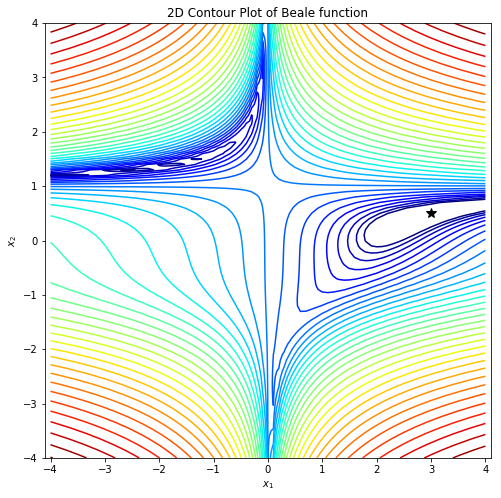

In [4]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)

In [5]:
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5 - x1 + x1*x2)*(x2-1) + 2*(2.25 - x1 + x1*x2**2)*(x2**2-1) + 2*(2.625 - x1 + x1*x2**3)*(x2**3-1)
    dfdx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*(2*x1*x2) + 2*(2.625 - x1 + x1*x2**3)*(3*x1*x2**2)
    return dfdx1, dfdx2

## 2. Momentum

In [6]:
def gd_momentum(df_dx, x0, conf_para=None):
    
    if conf_para is None:
        conf_para = {}
    
    conf_para.setdefault('n_iter', 1000) #number of iterations
    conf_para.setdefault('learning_rate', 0.001) #learning rate
    conf_para.setdefault('momentum', 0.9) #momentum parameter
    
    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0)
    
    for iter in range(1, conf_para['n_iter']+1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        v = conf_para['momentum']*v - conf_para['learning_rate']*dfdx
        x_traj.append(x_traj[-1]+v)
    
    return x_traj

In [7]:
x0 = np.array([1.0,1.5])
conf_para_momentum = {'n_iter':100,'learning_rate':0.005}
x_traj_momentum = gd_momentum(dbeale_dx, x0, conf_para_momentum)
print("The final solution is (x_1,x_2) = (",x_traj_momentum[-1][0],",",x_traj_momentum[-1][1],")")

The final solution is (x_1,x_2) = ( 3.2906784064202776 , 0.5659659204242713 )


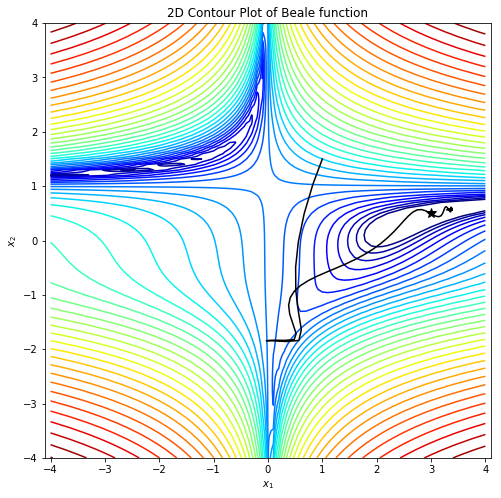

In [8]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_momentum = np.array(x_traj_momentum)
plt.plot(x_traj_momentum[:,0],x_traj_momentum[:,1],'k-')

**Exercise:**
Compare the results under different hyper-parameters (learning rate and momentum).

**Exercise:**
Compare the results under different initial guess.

## 3. AdaGrad

In [9]:
def gd_adagrad(df_dx, x0, conf_para=None):
    
    if conf_para is None:
        conf_para = {}
    
    conf_para.setdefault('n_iter', 1000) #number of iterations
    conf_para.setdefault('learning_rate', 0.001) #learning rate
    conf_para.setdefault('epsilon', 1e-7)
    
    x_traj = []
    x_traj.append(x0)
    r = np.zeros_like(x0)
    
    for iter in range(1, conf_para['n_iter']+1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        r += dfdx**2
        x_traj.append(x_traj[-1] - conf_para['learning_rate'] / (np.sqrt(r)+conf_para['epsilon']) * dfdx)
        
    return x_traj

In [10]:
x0 = np.array([1.0,1.5])
conf_para_adag = {'n_iter':100,'learning_rate':1}
x_traj_adag = gd_adagrad(dbeale_dx, x0, conf_para_adag)
print("The final solution is (x_1,x_2) = (",x_traj_adag[-1][0],",",x_traj_adag[-1][1],")")

The final solution is (x_1,x_2) = ( 2.716368698484391 , 0.4182576290251145 )


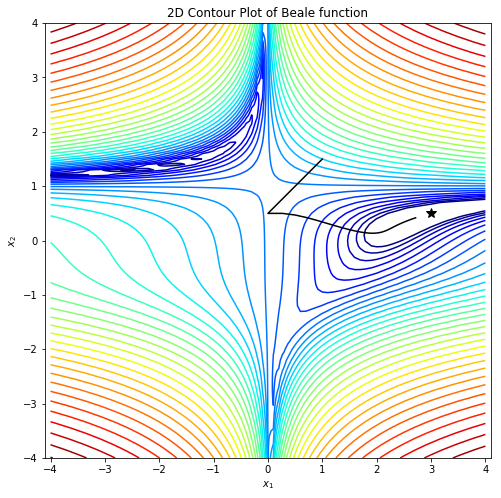

In [11]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_adag = np.array(x_traj_adag)
plt.plot(x_traj_adag[:,0],x_traj_adag[:,1],'k-')

**Exercise:**
Compare the results under different hyper-parameters.

**Exercise:**
Compare the results under different initial guess.

## 4. Exercise (Adam)

In [0]:
def gd_adam(df_dx, x0, conf_para=None):
    
    if conf_para is None:
        conf_para = {}
    
    conf_para.setdefault('n_iter', 1000) #number of iterations
    conf_para.setdefault('learning_rate', 0.001) #learning rate
    conf_para.setdefault('rho1', 0.9)
    conf_para.setdefault('rho2', 0.999)
    conf_para.setdefault('epsilon', 1e-8)

    # To do here